In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg

A = np.matrix([[ 1,  2, -3,  4,  5], #Matriz llave
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])

abc =['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ']
num = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
#47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588

B = np.matrix([[ 47,49,-19,257,487],
               [10,-9,63,137,236],
               [79,142,-184,372,536],
               [59,70,-40,332,588]]) #Matriz de mensaje encriptada
M = B@A.I #Matriz de mensaje decodificada

dicc = {}
for i in range(len(abc)):
    dicc[float(num[i])] = abc[i] 

a,b = M.shape
for i in range(a):
  for j in range(b):
    print(dicc.get(round(M.item((i,j)),0)))

A
R
E
 
Y
O
U
 
H
A
V
I
N
G
 
F
U
N
 
 


In [2]:
#programa para multiplicación de matrices
def producto_matrices(M1,M2):
  if len(M1[0]) == len(M2): #Columnas de la primera matriz igual a filas de la segunda
    M3 = []
    for i in range(len(M1)):
      M3.append([])
      for j in range(len(M2[0])): #matriz de ceros con las dimensiones de la matrix producto 
        M3[i].append(0)

    for i in range(len(M1)):
      for j in range(len(M2[0])):
        for k in range(len(M1[0])):
          M3[i][j] += M1[i][k] * M2[k][j] #producto punto filas por columnas

  else: 
    print('No es posible multiplicar las matrices')
  return M3

M1 = np.array([[1,2,3,4],[23,35,2,3]])
M2 = np.array([[3,4,5,2,5],[3,4,5,2,1],[3,7,5,3,2],[1,5,6,2,4]])
M3 = producto_matrices(M1,M2)
M3

[[22, 53, 54, 23, 29], [183, 261, 318, 128, 166]]

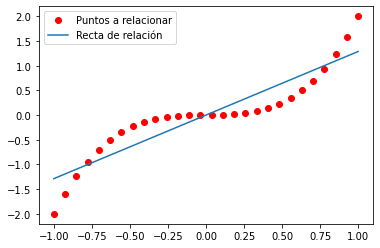

In [3]:
N = 28
x1 = np.linspace(-1, 1, N)
y = 2*x1**3 
df = pd.DataFrame({"Y":y, "X1":x1})

df["ones"] = np.ones(N)

plt.plot(df.X1,df.Y,"ro",label = 'Puntos a relacionar')

X = np.matrix(df[ ["ones","X1"] ])
np.shape(X)
y = np.reshape(df.Y.values, (N,1))

theta = (X.T@X).I@X.T@y #solución de la matrix incognita  

yrecta = theta.item(0,0) + theta.item(1,0) * x1 #ecuación de la recta
plt.plot(df.X1,yrecta,label='Recta de relación')
plt.legend()

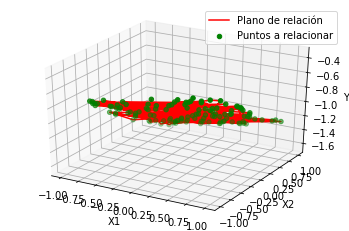

In [4]:
N = 120
x1 = np.linspace(-1, 1, N) 
x2 = np.linspace(-1, 1, N)

X1, X2 = np.meshgrid(x1,x2)
Y = 0.2*X1 - 0.5*X2 - 1.0

# Ecuaciones parametricas del mismo plano:
x1 = 2*np.random.random(N)-1
x2  = 2*np.random.random(N)-1
y = 0.2*x1 - 0.5*x2 - 1.0

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.scatter(x1, x2, y, color="green",label='Puntos a relacionar')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y1")

# Regresion bi-lineal
df = pd.DataFrame({"Y":y, "X1":x1,"X2":x2})
df["ones"] = np.ones(N)


y = np.reshape(df.Y.values, (N,1))
X = df[["ones","X1","X2"]].values
X = np.matrix(X)
theta = (X.T@X).I@X.T@y #solución de la matrix incognita  
yplano = theta.item(0,0) + theta.item(1,0)*x1 + theta.item(2,0)*x2 #ecuación del plano

plano = ax.plot(x1, x2, yplano, color="red",label='Plano de relación')
plt.legend()

In [5]:
#3.a diagonalizar A
A = np.array([[2,-1,1],[0,3,-1],[2,1,3]])
A

array([[ 2, -1,  1],
       [ 0,  3, -1],
       [ 2,  1,  3]])

In [6]:
eigen_values, P = np.linalg.eig(A) 
D= np.diag(eigen_values) #matriz diagonal de A
P = np.matrix(P) #matriz de paso
Adiag = np.round(P@D@P.I,0)
Adiag

matrix([[ 2.+0.j, -1.+0.j,  1.-0.j],
        [ 0.-0.j,  3.-0.j, -1.-0.j],
        [ 2.+0.j,  1.+0.j,  3.+0.j]])

In [7]:
#3.d
t = sp.Symbol('t')
x0,y0,z0 = sp.symbols('x0,y0,z0')
r0 = sp.matrices.Matrix([[x0],[y0],[z0]]) #condición inical

x,y,z = sp.symbols('x,y,z')
r = sp.matrices.Matrix([[x],[y],[z]]) #variables

A_sympy = sp.matrices.Matrix(A)
r_func = lambda r0,M,t: sp.exp(M*t)*r0 #solución análitica
sol_analitica = r_func(r0,A_sympy,t) 
(sol_analitica.row_join(r))*2 #matriz aumentada

Matrix([
[            -2*t*y0*exp(2*t) + 2*x0*(-t*exp(2*t) + exp(4*t)/2 + exp(2*t)/2) + 2*z0*(exp(4*t)/2 - exp(2*t)/2), 2*x],
[2*x0*(t*exp(2*t) - exp(4*t)/2 + exp(2*t)/2) + 2*y0*(t*exp(2*t) + exp(2*t)) + 2*z0*(-exp(4*t)/2 + exp(2*t)/2), 2*y],
[              2*t*y0*exp(2*t) + 2*x0*(t*exp(2*t) + exp(4*t)/2 - exp(2*t)/2) + 2*z0*(exp(4*t)/2 + exp(2*t)/2), 2*z]])

In [8]:
#3.b
t = np.linspace(0,2,3)
sol = r_func(r0,A_sympy,t) 
sol.row_join(r) #matrix aumentada con soluciones de x,y,z para t entre [0,2]

Matrix([
[x0*exp([[0, -1.0, 2.0], [0, 3.0, -2.0], [0, 1.0, 6.0]]), x],
[y0*exp([[0, -1.0, 2.0], [0, 3.0, -2.0], [0, 1.0, 6.0]]), y],
[z0*exp([[0, -1.0, 2.0], [0, 3.0, -2.0], [0, 1.0, 6.0]]), z]])

Text(0.5, 0, 't')

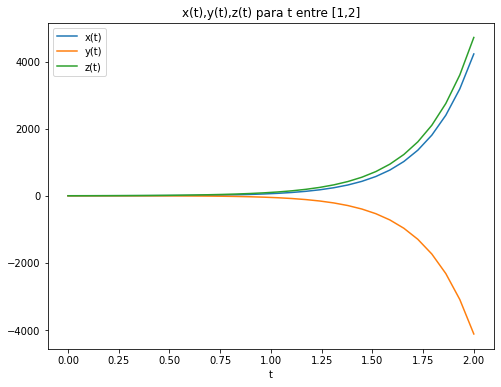

In [9]:
#3.c

def expAt(A,t):
  return(linalg.expm(A*t))

def r_sol(A, r0, t):
  return(np.dot(expAt(A,t), r0))

r0 = np.array([1, 1, 2])
t = np.linspace(0,2,30)
R = np.array([r_sol(A, r0, t[i]) for i in range(len(t))])
xt = R.T[0]
yt = R.T[1]
zt = R.T[2]

#grafica
plt.figure(figsize=(8,6))
plt.title('x(t),y(t),z(t) para t entre [1,2]')
plt.plot(t, xt, label = 'x(t)')
plt.plot(t, yt, label = 'y(t)')
plt.plot(t, zt, label = 'z(t)')
plt.legend()
plt.xlabel('t')

# plt.ylabel('f')

# exp = lambda A,t: linalg.expm(A*t)

# r_sol = lambda A,t,r0: np.dot(exp(A,t), r0)
# R=np.array([r_sol(A, r0, t[i]) for i in range(len(t))])
# R
# t0 = None
# t1 = None
# t2 = None
# for i in range(len(t)):
#   sol = r_func(r0,A_sympy,t[i])
#   sol_lambda =sp.lambdify((x0,y0,z0),sol,'numpy')
 
#   if i==0:
#     t0 = sol_lambda(1,1,2) #solución para t = 0
#   if i==1:
#     t1 = sol_lambda(1,1,2) #solución para t = 1
#   if i==2:
#     t2 = sol_lambda(1,1,2) #solución para t = 2
# plt.figure 
# plt.scatter(t,(t0[0],t1[0],t2[0]),label = 'x(t)')
# plt.scatter(t,(t0[1],t1[1],t2[1]),label = 'y(t)')
# plt.scatter(t,(t0[2],t1[2],t2[2]),label = 'z(t)')
# plt.legend()
# plt.xlabel('t')
# plt.ylabel('f')
# plt.title('x(t),y(t),z(t) para t entre [1,2]')